In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import subprocess
import os

In [9]:
def get_chart(n, r_list):
    
    result = {}
    
    for r in r_list:
        
        output_path = "output.csv"
        
        try:
            os.remove(output_path)
        except OSError:
            pass
        
        bashCommand = "./build/main -r {} -n {}".format(r ,n)
        _ = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE).communicate()
        
        output = pd.read_csv(output_path)
        
        for p_type in output['parallel_type']:
            exec_time = output.loc[output['parallel_type'] == p_type]['time'][p_type]
            
            if result.get(p_type) is not None:
                result[p_type].append(exec_time)
            else:
                result[p_type] = [exec_time]

    fig, ax = plt.subplots()
    
    ax.plot(r_list, result[0], markersize=5, marker='o', label="Without parallel")
    ax.plot(r_list, result[1], markersize=5, marker='o', label="External parallel")
    ax.plot(r_list, result[2], markersize=5, marker='o', label="Internal parallel")

    ax.set(xlabel='Size of a block (r)', ylabel='Execution time (In seconds)',
           title='График зависимости времени умножения матрицы размера (n={}) от размера блока'.format(n))
    ax.grid()
    
    plt.legend()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()

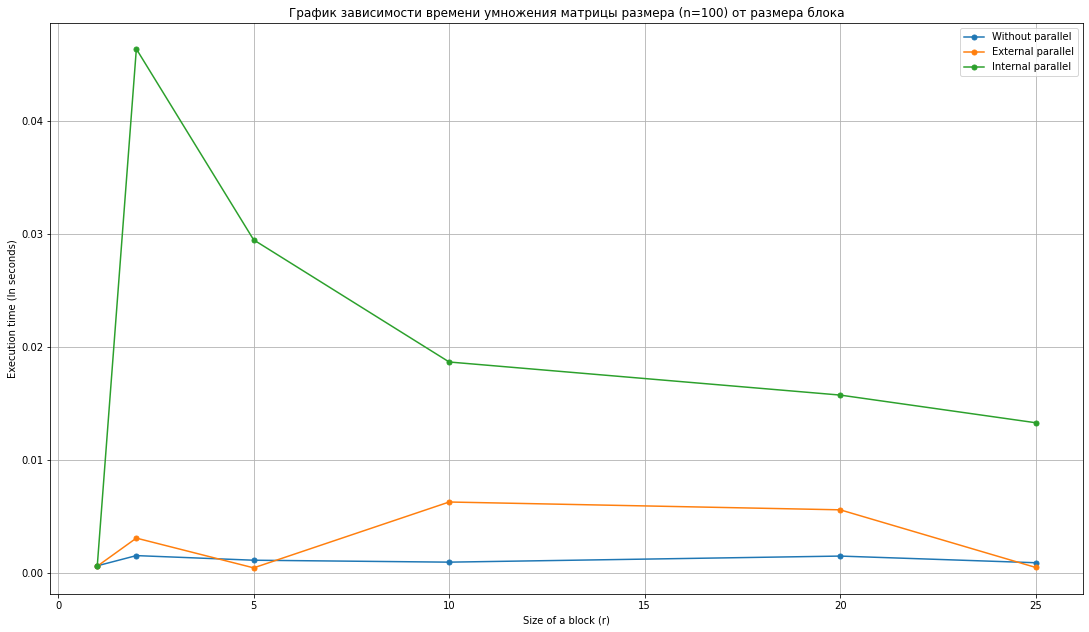

In [10]:
for n in [100]:
    r_values = [[1, 2, 5, 10, 20, 25]]
        
    for r in r_values:
        get_chart(n, r)

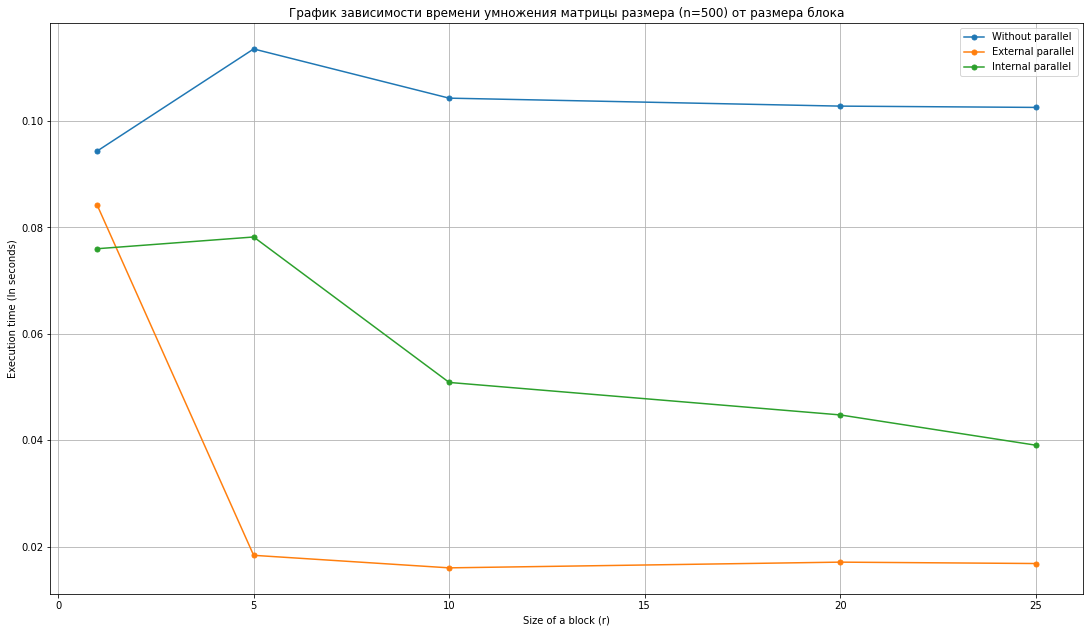

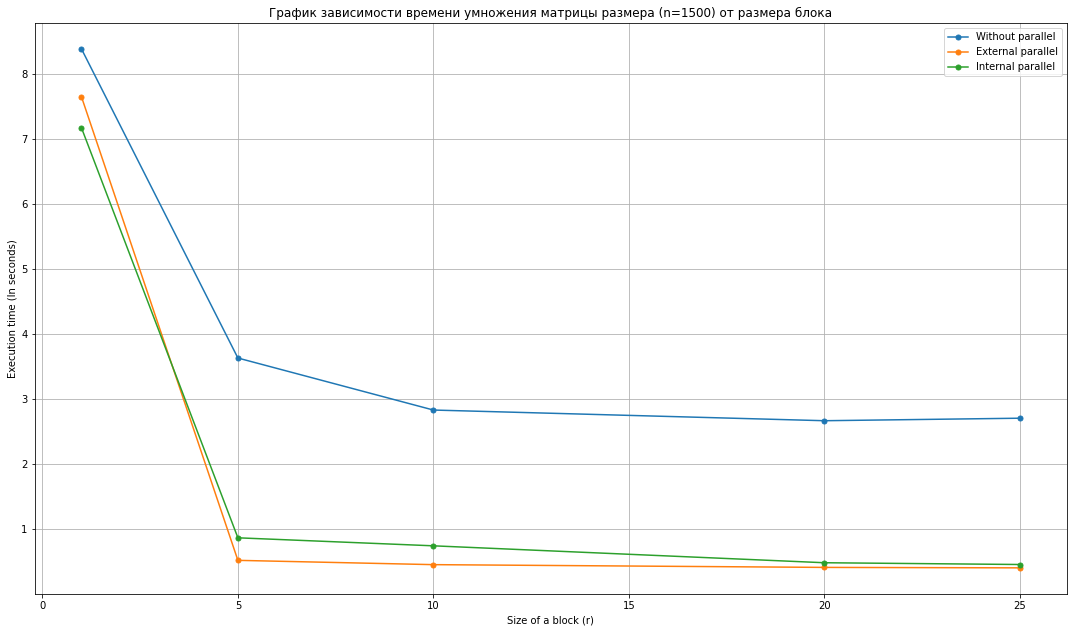

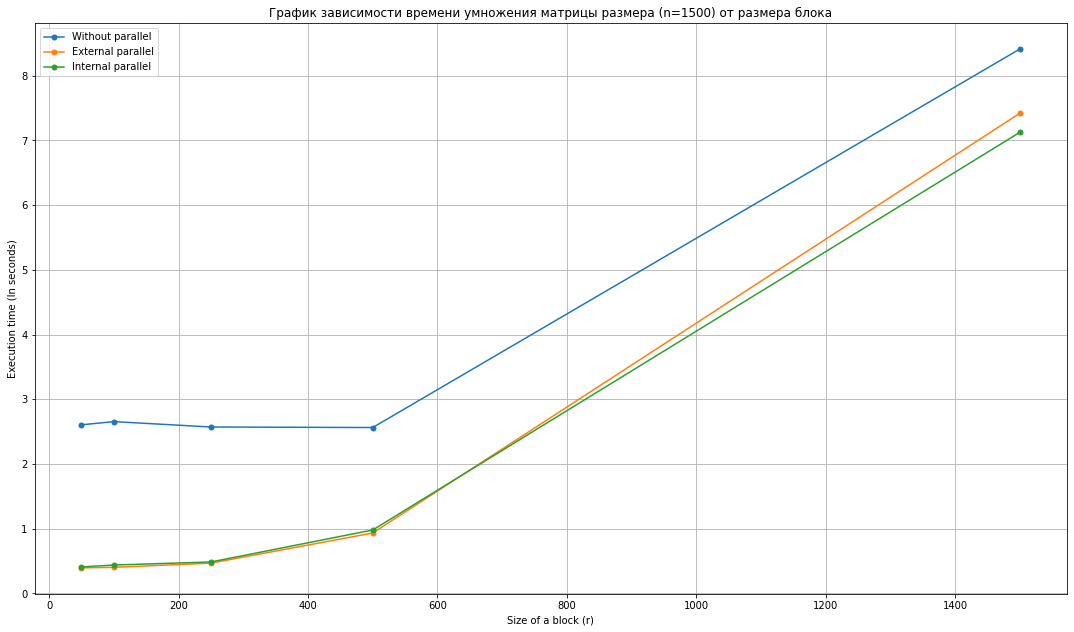

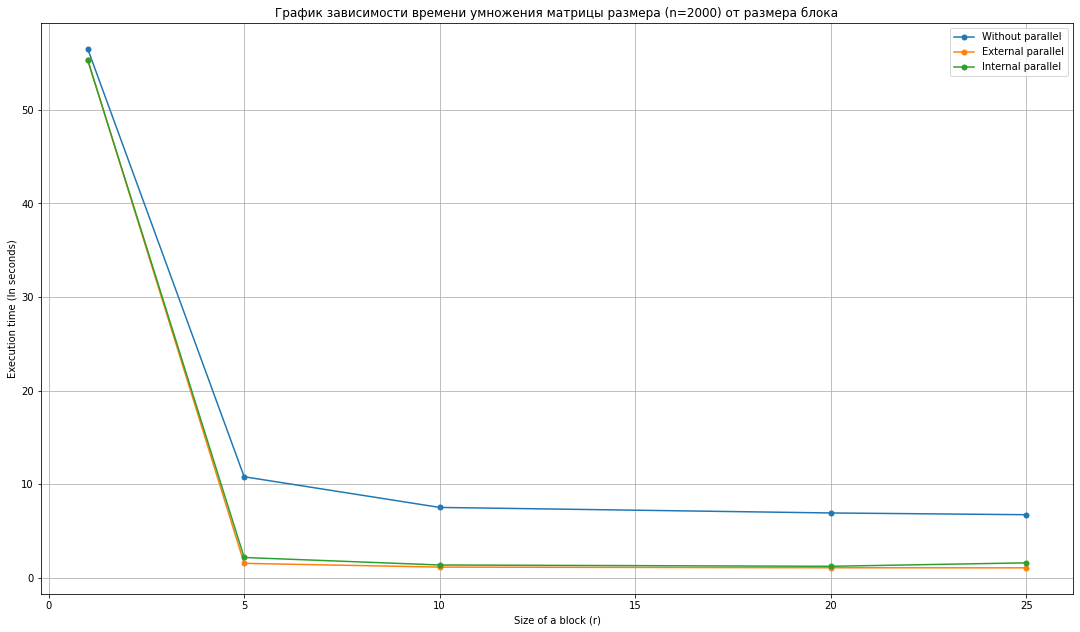

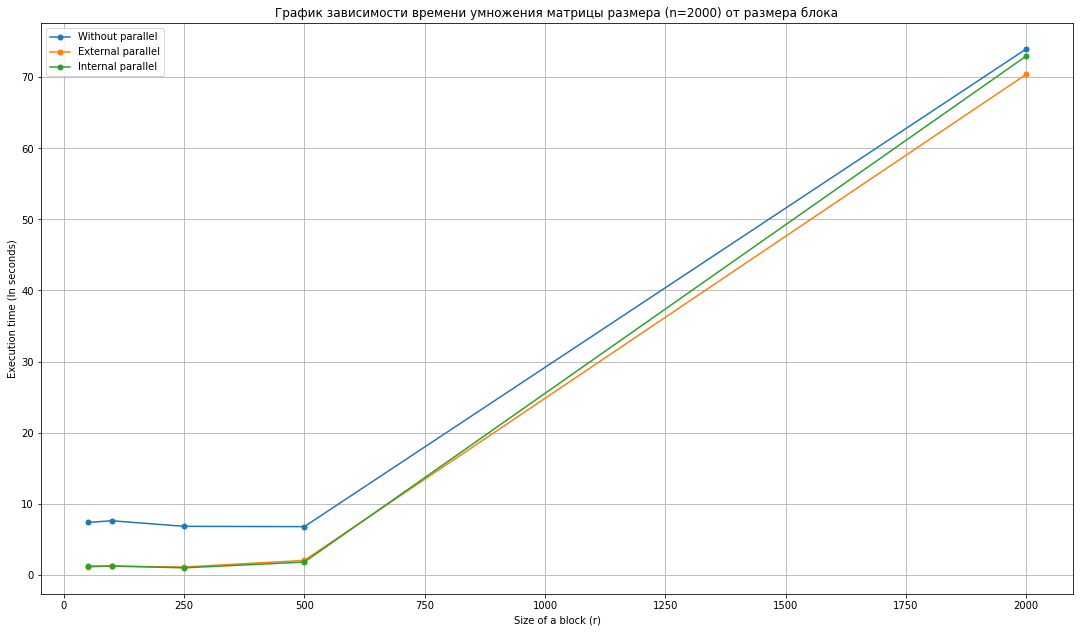

In [11]:
for n in [500, 1500, 2000]:
    r_values = [[1, 5, 10, 20, 25]]
    
    if (n >= 1000):
        r_values.append([50, 100, 250, 500, n])
        
    for r in r_values:
        get_chart(n, r)